In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#add headers 
feature_names = ['age','workclass','fnlwgt','education','education_num','marital_status','occupation','relationship','race','sex','capital_gain','capital_loss','hours_per_week','native_country','50k']

train_df_nan = pd.read_csv('/Users/suzannezhen/Documents/Data Mining /Project/census-income.data.csv .csv', names = feature_names) 
test_df_nan = pd.read_csv('/Users/suzannezhen/Documents/Data Mining /Project/census-income.test.csv .csv', names = feature_names)


In [3]:
print('The total number of instances in train data is', len(train_df_nan), 'with features', len(train_df_nan.columns))
print('The total number of instances in test data is', len(test_df_nan), 'with features', len(test_df_nan.columns))

The total number of instances in train data is 32561 with features 15
The total number of instances in test data is 16281 with features 15


In [4]:
# replace '?' with nan values 
train_df_nan.replace(' ?', np.nan, inplace=True)
test_df_nan.replace(' ?', np.nan, inplace=True)

#replace the label column with '0' and '1', <=50k = 0; >50k = 1
train_df_nan['50k'] = pd.get_dummies(train_df_nan).iloc[:,-1]
test_df_nan['50k'] = pd.get_dummies(test_df_nan).iloc[:,-1]

counts_train = train_df_nan['50k'].value_counts()
counts_test = test_df_nan['50k'].value_counts()

print(counts_train)
print('***less than 50k',round(counts_train[0]/len(train_df_nan['50k']),3), '***More than 50k', round(counts_train[1]/len(train_df_nan['50k']),3))
print(counts_test)
print('***less than 50k',round(counts_test[0]/len(test_df_nan['50k']),3), '***More than 50k', round(counts_test[1]/len(test_df_nan['50k']),3))


#print(train_df_nan.head(50))
#print(test_df_nan.head(50))

0    24720
1     7841
Name: 50k, dtype: int64
***less than 50k 0.759 ***More than 50k 0.241
0    12435
1     3846
Name: 50k, dtype: int64
***less than 50k 0.764 ***More than 50k 0.236


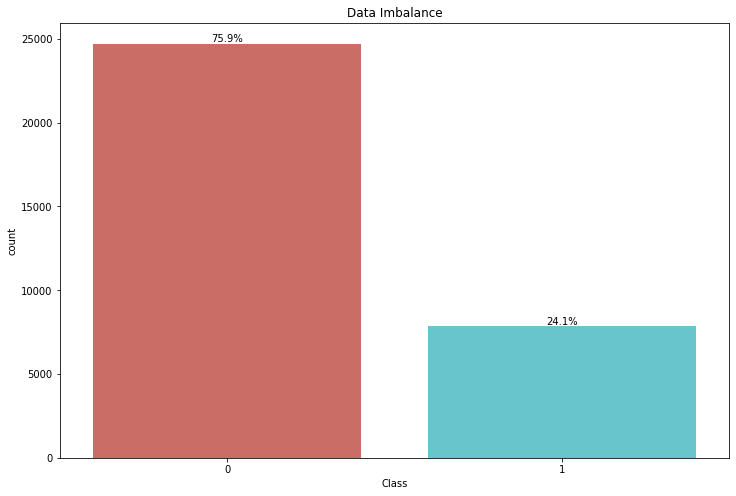

In [78]:
import seaborn as sb
import matplotlib.pyplot as plt
from pylab import rcParams

rcParams['figure.figsize'] = 12, 10
font = {'color':  'black',
        'size': "100",
        }
ncount = len(train_df_nan)
plt.figure(figsize=(12,8))
ax = sb.countplot(x='50k',data=train_df_nan, palette='hls')
plt.title('Data Imbalance')
plt.xlabel('Class')

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom') 


plt.show()


In [5]:
#count instances with nan values
train_df = train_df_nan.dropna()
print(len(train_df_nan) - len(train_df), 'train instances contain missing values')
print(train_df_nan.isnull().sum())

test_df = test_df_nan.dropna()
print(len(test_df_nan) - len(test_df), 'test instances contain missing values')
print(test_df_nan.isnull().sum())

2399 train instances contain missing values
age                  0
workclass         1836
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
50k                  0
dtype: int64
1221 test instances contain missing values
age                 0
workclass         963
fnlwgt              0
education           0
education_num       0
marital_status      0
occupation        966
relationship        0
race                0
sex                 0
capital_gain        0
capital_loss        0
hours_per_week      0
native_country    274
50k                 0
dtype: int64


In [6]:
train_df_nan.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,50k
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [7]:
train_df_nan['occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

In [8]:
#use mode or KNN to fill missing values (pick two to three methods)

#fillna with mode 

#print(train_df_nan['workclass'].value_counts(dropna=False).head())
#print(train_df_nan['occupation'].value_counts(dropna=False).head())
#print(train_df_nan['native_country'].value_counts(dropna=False).head())

train_df_nan['workclass'].fillna(train_df_nan['workclass'].mode()[0],inplace=True)
train_df_nan['occupation'].fillna(value ='Other-service', inplace=True)      #replace NaN occupation with other services
train_df_nan['native_country'].fillna(train_df_nan['native_country'].mode()[0],inplace=True)

#print('*'*100, train_df_nan.isnull().sum())


#print(test_df_nan['workclass'].value_counts(dropna=False).head())
#print(test_df_nan['occupation'].value_counts(dropna=False).head(10))
#print(test_df_nan['native_country'].value_counts(dropna=False).head())


test_df_nan['workclass'].fillna(test_df_nan['workclass'].mode()[0],inplace=True)
test_df_nan['occupation'].fillna(value ='Other-service', inplace=True)      #replace NaN occupation with other services
test_df_nan['native_country'].fillna(test_df_nan['native_country'].mode()[0],inplace=True)


#print('*'*100, test_df_nan.isnull().sum())


In [41]:
#handle unbalanced data (oversampling)
#balancing the data

from sklearn.utils import resample

train_df_nan['50k'].value_counts()
rich=train_df_nan.loc[train_df_nan['50k']==1]
poor=train_df_nan.loc[train_df_nan['50k']==0]
train_df_nan['50k'].value_counts()
rich_upsample=resample(rich,replace=True,n_samples=len(poor),random_state=27)
balancetrain=pd.concat([rich_upsample,poor],ignore_index=True)
balancetrain['50k'].value_counts()


1    24720
0    24720
Name: 50k, dtype: int64

In [42]:
#transform categorical data into numeric data (encoder and one hot encoder)
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
ohe = OneHotEncoder(sparse=False, categories='auto')


categoric_col_train = balancetrain[['workclass','sex','marital_status','occupation','relationship','native_country','race']]

categoric_arr_train = ohe.fit_transform(categoric_col_train)
categoric_labels_train = ohe.categories_

categoric_col_train =[]
for i in categoric_labels_train:
    for label in list(i):
        categoric_col_train.append(label)
    
enc_df_train = pd.DataFrame(categoric_arr_train, columns=categoric_col_train)

enc_df_train

,Federal-gov,Local-gov,Never-worked,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay,Female,Male,...,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49435,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
49436,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
49437,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
49438,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [43]:
from sklearn import preprocessing

continuous_df_train = balancetrain[['age', 'fnlwgt', 'education_num', 'capital_gain','capital_loss','hours_per_week']]
continuous_norm_train = preprocessing.normalize(continuous_df_train, norm='l2', axis=1)
norm_df_train = pd.DataFrame(continuous_norm_train,columns=list(continuous_df_train))

norm_df_train

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,0.000125,1.000000,0.000051,0.000000,0.0,0.000235
1,0.000381,1.000000,0.000055,0.000000,0.0,0.000246
2,0.000365,1.000000,0.000048,0.000000,0.0,0.000054
3,0.000252,0.992981,0.000102,0.118277,0.0,0.000394
4,0.000436,1.000000,0.000087,0.000000,0.0,0.000268
...,...,...,...,...,...,...
49435,0.000276,1.000000,0.000121,0.000000,0.0,0.000095
49436,0.000071,1.000000,0.000032,0.000000,0.0,0.000129
49437,0.000105,1.000000,0.000047,0.000000,0.0,0.000148
49438,0.000382,1.000000,0.000059,0.000000,0.0,0.000263


In [44]:
X_df_train = pd.concat([enc_df_train, norm_df_train], axis=1)

X_df_train

,Federal-gov,Local-gov,Never-worked,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay,Female,Male,...,Asian-Pac-Islander,Black,Other,White,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.000125,1.000000,0.000051,0.000000,0.0,0.000235
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.000381,1.000000,0.000055,0.000000,0.0,0.000246
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.000365,1.000000,0.000048,0.000000,0.0,0.000054
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.000252,0.992981,0.000102,0.118277,0.0,0.000394
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.000436,1.000000,0.000087,0.000000,0.0,0.000268
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49435,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.000276,1.000000,0.000121,0.000000,0.0,0.000095
49436,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.000071,1.000000,0.000032,0.000000,0.0,0.000129
49437,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.000105,1.000000,0.000047,0.000000,0.0,0.000148
49438,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.000382,1.000000,0.000059,0.000000,0.0,0.000263


In [45]:
#transform categorical data into numeric data (encoder and one hot encoder)
#test data

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
ohe = OneHotEncoder(sparse=False, categories='auto')


categoric_col_test = test_df_nan[['workclass','sex','marital_status','occupation','relationship','native_country','race']]

categoric_arr_test = ohe.fit_transform(categoric_col_test)
categoric_labels_test = ohe.categories_

categoric_col_test =[]
for i in categoric_labels_test:
    for label in list(i):
        categoric_col_test.append(label)
    
    
enc_df_test = pd.DataFrame(categoric_arr_test, columns=categoric_col_test)

# test_data is missing a column ' Holand-Netherlands' compared to train data 
# train = list(enc_df_train)
# test = list(enc_df_test)
# set(train)-set(test)

loc = enc_df_train.columns.get_loc(' Holand-Netherlands')
enc_df_test.insert(loc, ' Holand-Netherlands', 0)
enc_df_test.shape

(16281, 84)

In [46]:
from sklearn import preprocessing

continuous_df_test = test_df_nan[['age', 'fnlwgt', 'education_num', 'capital_gain','capital_loss','hours_per_week']]
continuous_norm_test = preprocessing.normalize(continuous_df_test, norm='l2', axis=1)
norm_df_test = pd.DataFrame(continuous_norm_test,columns=list(continuous_df_test))


In [15]:
X_df_test = pd.concat([enc_df_test, norm_df_test], axis=1)

X_df_test

,Federal-gov,Local-gov,Never-worked,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay,Female,Male,...,Asian-Pac-Islander,Black,Other,White,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.000110,1.000000,0.000031,0.000000,0.0,0.000176
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.000423,1.000000,0.000100,0.000000,0.0,0.000557
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.000083,1.000000,0.000036,0.000000,0.0,0.000119
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.000274,0.998852,0.000062,0.047898,0.0,0.000249
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.000174,1.000000,0.000097,0.000000,0.0,0.000290
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.000181,1.000000,0.000060,0.000000,0.0,0.000167
16277,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.000199,1.000000,0.000028,0.000000,0.0,0.000124
16278,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.000101,1.000000,0.000035,0.000000,0.0,0.000133
16279,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.000523,0.997892,0.000155,0.064888,0.0,0.000476


In [47]:
Y_df_train = balancetrain['50k'].astype(float)
Y_df_test = test_df_nan['50k'].astype(float)


In [265]:
#algorithms: SVM/ Random Forest/ KNN/ Naive Bayes

In [52]:
#SVM linear

from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

svclassifier = SVC(kernel='linear')
svclassifier.fit(X_df_train, Y_df_train)

y_pred = svclassifier.predict(X_df_test)

print(confusion_matrix(Y_df_test,y_pred))
print(classification_report(Y_df_test,y_pred))


[[9242 3193]
 [ 616 3230]]
              precision    recall  f1-score   support

         0.0       0.94      0.74      0.83     12435
         1.0       0.50      0.84      0.63      3846

    accuracy                           0.77     16281
   macro avg       0.72      0.79      0.73     16281
weighted avg       0.83      0.77      0.78     16281



In [53]:
# SVM rbf kernel 
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

svclassifier = SVC(kernel='rbf', gamma =0.1, C = 10)
svclassifier.fit(X_df_train, Y_df_train)

y_pred = svclassifier.predict(X_df_test)

print(confusion_matrix(Y_df_test,y_pred))
print(classification_report(Y_df_test,y_pred))


[[9233 3202]
 [ 627 3219]]
              precision    recall  f1-score   support

         0.0       0.94      0.74      0.83     12435
         1.0       0.50      0.84      0.63      3846

    accuracy                           0.76     16281
   macro avg       0.72      0.79      0.73     16281
weighted avg       0.83      0.76      0.78     16281



In [60]:
#SVM polynomial kernel

from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

svclassifier = SVC(kernel='poly', degree = 2)
svclassifier.fit(X_df_train, Y_df_train)

y_pred = svclassifier.predict(X_df_test)

print(confusion_matrix(Y_df_test,y_pred))
print(classification_report(Y_df_test,y_pred))

#accuracy goes down if increase power, relationship is linear


/Users/suzannezhen/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[[8385 4050]
 [ 556 3290]]
              precision    recall  f1-score   support

         0.0       0.94      0.67      0.78     12435
         1.0       0.45      0.86      0.59      3846

    accuracy                           0.72     16281
   macro avg       0.69      0.76      0.69     16281
weighted avg       0.82      0.72      0.74     16281



In [58]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

RFclassifier = RandomForestClassifier(n_estimators =50)
RFclassifier.fit(X_df_train, Y_df_train)

y_pred = RFclassifier.predict(X_df_test)

print(confusion_matrix(Y_df_test,y_pred))
print(classification_report(Y_df_test,y_pred))

[[10824  1611]
 [ 1328  2518]]
              precision    recall  f1-score   support

         0.0       0.89      0.87      0.88     12435
         1.0       0.61      0.65      0.63      3846

    accuracy                           0.82     16281
   macro avg       0.75      0.76      0.76     16281
weighted avg       0.82      0.82      0.82     16281



In [59]:
#KNN
from sklearn.neighbors import KNeighborsClassifier

KNNclassifier =KNeighborsClassifier(n_neighbors=5)
KNNclassifier.fit(X_df_train, Y_df_train)

y_pred = KNNclassifier.predict(X_df_test)

print(confusion_matrix(Y_df_test,y_pred))
print(classification_report(Y_df_test,y_pred))

[[9497 2938]
 [ 983 2863]]
              precision    recall  f1-score   support

         0.0       0.91      0.76      0.83     12435
         1.0       0.49      0.74      0.59      3846

    accuracy                           0.76     16281
   macro avg       0.70      0.75      0.71     16281
weighted avg       0.81      0.76      0.77     16281



In [63]:
#naive bay
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix

nb = GaussianNB()
nb.fit(X_df_train, Y_df_train)

y_pred = nb.predict(X_df_test)

print(confusion_matrix(Y_df_test,y_pred))
print(classification_report(Y_df_test,y_pred))

[[4933 7502]
 [ 204 3642]]
              precision    recall  f1-score   support

         0.0       0.96      0.40      0.56     12435
         1.0       0.33      0.95      0.49      3846

    accuracy                           0.53     16281
   macro avg       0.64      0.67      0.52     16281
weighted avg       0.81      0.53      0.54     16281



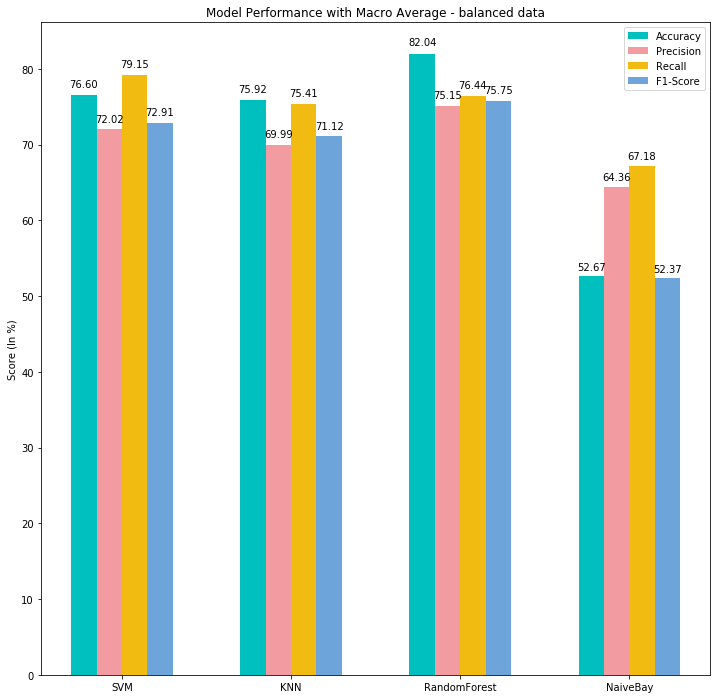

In [85]:
#plotting the data with balancing - macro
N=4
Accuracy_score = (76.6, 75.92, 82.04, 52.67)
Precision_score = (72.02, 69.99, 75.15, 64.36)
Recall_score = (79.15,75.41,76.44,67.18)
F1_score = (72.91, 71.12, 75.75, 52.37)
ind = np.arange(N, dtype='float')  # the x locations for the groups
width = 0.15      # the width of the bars

fig, ax = plt.subplots(figsize=(12,12))
rects1 = ax.bar(ind, Accuracy_score, width, color='c')
rects2 = ax.bar(ind + width, Precision_score, width, color='#f29ca2')
rects3 = ax.bar(ind + 2*width, Recall_score, width, color='#f2bb12')
rects4 = ax.bar(ind + 3*width, F1_score, width, color='#6da4d9')


ax.set_ylabel('Score (In %)')
ax.set_title('Model Performance with Macro Average - balanced data')
ax.set_xticks(ind + width*1.5)
ax.set_xticklabels(('SVM', 'KNN', 'RandomForest','NaiveBay'))

ax.legend((rects1[0], rects2[0], rects3[0], rects4[0]), ('Accuracy', 'Precision', 'Recall', 'F1-Score'))


def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.01*height,
                '%.2f' % float(height),
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)

plt.show()

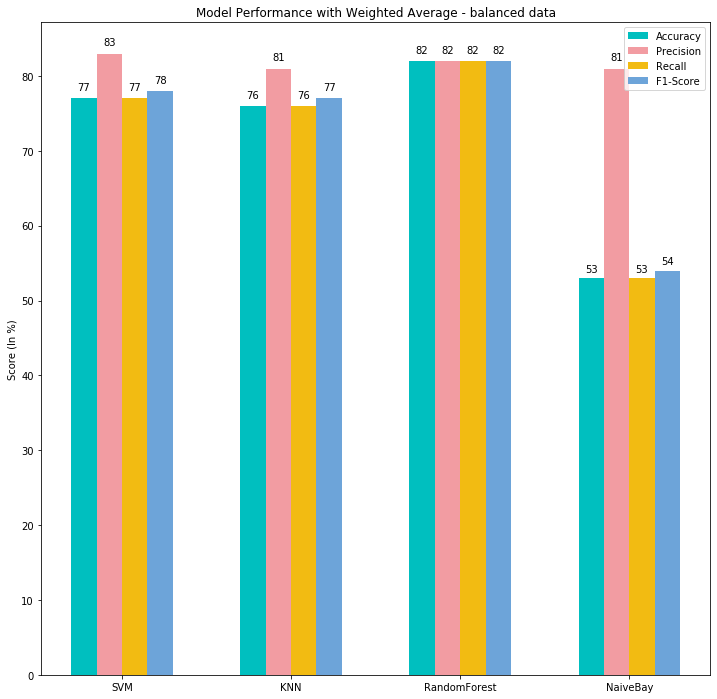

In [93]:
#plotting the data with balancing, weighted
N=4
Accuracy_score = (77, 76, 82, 53)
Precision_score = (83, 81, 82, 81)
Recall_score = (77,76,82,53)  
F1_score = (78, 77, 82, 54)   
ind = np.arange(N, dtype='float')  # the x locations for the groups
width = 0.15      # the width of the bars

fig, ax = plt.subplots(figsize=(12,12))
rects1 = ax.bar(ind, Accuracy_score, width, color='c')
rects2 = ax.bar(ind + width, Precision_score, width, color='#f29ca2')
rects3 = ax.bar(ind + 2*width, Recall_score, width, color='#f2bb12')
rects4 = ax.bar(ind + 3*width, F1_score, width, color='#6da4d9')


ax.set_ylabel('Score (In %)')
ax.set_title('Model Performance with Weighted Average - balanced data')
ax.set_xticks(ind + width*1.5)
ax.set_xticklabels(('SVM', 'KNN', 'RandomForest','NaiveBay'))

ax.legend((rects1[0], rects2[0], rects3[0], rects4[0]), ('Accuracy', 'Precision', 'Recall', 'F1-Score'))


def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.01*height,
                '%.0f' % float(height),
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)

plt.show()

In [72]:
#Training Data Accuracy CV

from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

svclassifier = SVC(kernel='linear')

scores = cross_val_score(svclassifier, X_df_train, Y_df_train, cv=5)
print(np.mean(scores))


0.7864279935275083


In [73]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

svclassifier = SVC(kernel='rbf', gamma =0.1, C = 10)

scores = cross_val_score(svclassifier, X_df_train, Y_df_train, cv=5)
print(np.mean(scores))


0.8038025889967638


In [74]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

svclassifier = SVC(kernel='poly', degree = 2)

scores = cross_val_score(svclassifier, X_df_train, Y_df_train, cv=5)
print(np.mean(scores))

/Users/suzannezhen/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/suzannezhen/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/suzannezhen/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/suzannezhen/opt/an

0.7588996763754045


In [75]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

RFclassifier = RandomForestClassifier(n_estimators =50)

scores = cross_val_score(RFclassifier, X_df_train, Y_df_train, cv=5)
print(np.mean(scores))

0.9147046925566343


In [76]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

KNNclassifier =KNeighborsClassifier(n_neighbors=5)

scores = cross_val_score(KNNclassifier, X_df_train, Y_df_train, cv=5)
print(np.mean(scores))

0.8261529126213591


In [77]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

nb = GaussianNB()

scores = cross_val_score(nb, X_df_train, Y_df_train, cv=5)
print(np.mean(scores))

0.6762135922330097


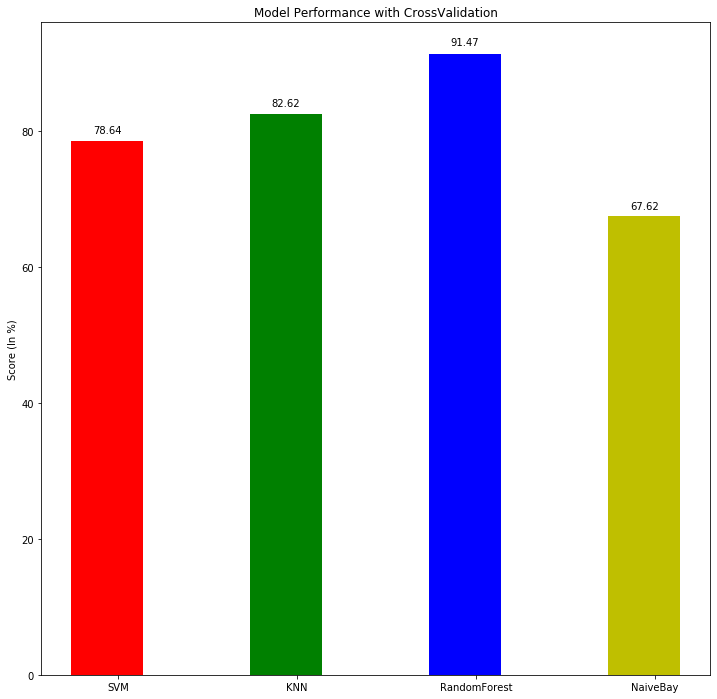

In [83]:
import numpy as np
import matplotlib.pyplot as plt
N=4
Accuracy_score = (78.64,82.62,91.47,67.62)

ind = np.arange(N, dtype='float')  # the x locations for the groups
width = 0.4     # the width of the bars

fig, ax = plt.subplots(figsize=(12,12))
rects1 = ax.bar(ind, Accuracy_score, width, color='rgby')


ax.set_ylabel('Score (In %)')
ax.set_title('Model Performance with CrossValidation')
ax.set_xticks(ind + width*0.15)
ax.set_xticklabels(('SVM', 'KNN', 'RandomForest','NaiveBay'))



def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.01*height,
                '%.2f' % float(height),
                ha='center', va='bottom')

autolabel(rects1)


plt.show()